# Data exploration and Dimensionality reduction

## OUTLINE: 

Data pre-processing, plotting and dimensionality reduction

1. Reading the file
2. Missing Values
3. Impute with scikit-learn
4. Implement imputation
5. Plotting
6. Standardization
7. Dimensionality reduction
8. Multi-Dimensional Scaling

In [1]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from matplotlib.colors import ListedColormap

from warnings import filterwarnings

filterwarnings("ignore")


RSEED = 8


## DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

We will use **Modified Pima Indians Diabetes Database please use the one in the repo, not the original one**.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on specific diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

According to the information on the data, it has eight attributes and one binary class. The brief explanation of the attributes are as follows:

- Pregnancies: Number of times pregnant.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure: Diastolic blood pressure (mm Hg).

- SkinThickness: Triceps skin fold thickness (mm).

- Insulin: 2-Hour serum insulin (mu U/ml).

- BMI: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction: Diabetes pedigree function.

- Age: Age (years).

- and we have a binary class which can be 0 (healthy) or 1 (diabetes).

## *1.* Reading the file

### `Read the dataset using pandas. Use the csv file called diabetes.csv that you will find on ilearn.`

In [2]:
# call your dataset: data
data = pd.read_csv("./dataset/diabetes.csv")

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *2.* Missing values

### It seems like there is no null data encoded as such. However, if you check the values in the dataset, there are many that might look strange (maybe some values that do not make sense?). 

### `Plot a bar plot of the 'missing' values (values that are encoded with values that do not make sense) per attribute, excluding the attributes 'Pregnancies', 'Outcome'. The plot must have a title and the bars of the plot must be named to their respective attribute names.` 



Text(0, 0.5, 'Count')

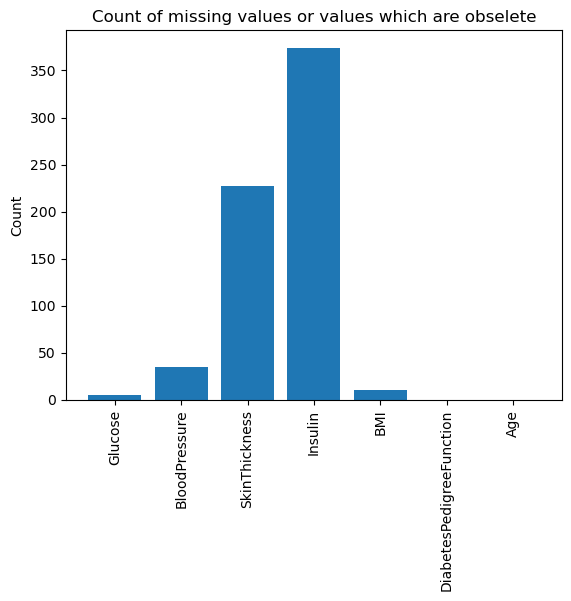

In [6]:
Columns = data.loc[:,'Glucose':'Age']

# Here values less than zero are not considered in the condition because there are no values that are less than 0 for the following columns
# Uncomment to check for negative values
'''

Values_less_than_0 = (Columns<0).sum()
print(Values_less_than_0)

'''
missing_Value_Summary = (Columns == 0).sum()
fig , ax = plt.subplots()
ax.bar(missing_Value_Summary.index,missing_Value_Summary)
ax.set_title('Count of missing values or values which are obselete')
ax.set_xticklabels(missing_Value_Summary.index,rotation=90)
ax.set_ylabel('Count')


## *3.* Impute with scikit-learn

### Is it normal that people's BMI is so low, in some cases? so low that they seem to not have a mass? or not? What about Glucose, and Blood Pressure? You may want to change some values into another reasonable value, such as mean or median. The only thing that can have zero value is the attribute **'Pregnancies'**. 

### **NOTE**! The attribute **'Outcome'** is your class. The class SHOULD NOT be included the cleaning process.

### `Impute the missing values using the SimpleImputer from scikit-learn with strategy = 'mean'. Return a pandas dataframe called 'data_imputed' that includes both the imputed attributes and the ones that you did not impute (Pregnancies, Outcome). The dataframe called 'data' SHOULD REMAIN UNCHANGED (not imputed) as it will be used again in the next task.`
### For the scikit-learn imputation, you can find more information [here](https://scikit-learn.org/stable/modules/impute.html).

In [7]:
# Scickit-learn version
# The steps are just indicative, if you want to do it your own way, please do so as long you store in data_imputed a dataset that includes 
# both the imputed attributes and the ones that you did not impute (Pregnancies, Outcome). The dataframe 'data' must remain unchanged (not imputed). 
  
# step 1: create a copy of the original dataset called data_imputed
# step 2: create a list with the names of the attributes that you will impute, call it columns_to_impute
# step 3: create a new dataset called df_part, that includes only the columns that you will impute (the ones from step 2)
# step 4: define the SimpleImputer object (from sklearn) with strategy='mean' and call it imputer, fit and transform the dataset that you created in step 3 
# step 5: convert the resulting array from step 4 into a dataframe, as column names you can pass the names of attributes of the list that you created in step 2. call it df_converted
# step 6: in data_imputed (which is still a copy of data (the original dataset) replace the attributes you wanted to impute with the attribures in df_converted. The dataframe called 'data' should remain 
# unchanged. 
# data_imputed should contain all 8 attributes and the class, where every attribute -except 'Pregnancies' and 'Outcome'- have imputed values 
 


# Write your code here
data_imputed = data.copy()

Columns_to_immpute = data.columns[1:8]

df_part = data[Columns_to_immpute]

Int_Columns_imputed = df_part.select_dtypes(include=['int64'])

imputer = SimpleImputer(missing_values=0, strategy='mean')

imputed_values = imputer.fit_transform(df_part)

df_converted = pd.DataFrame(imputed_values,columns=Columns_to_immpute)

for col in Int_Columns_imputed:
    df_converted[col] = df_converted[col].round().astype('int64',copy=True)


data_imputed[Columns_to_immpute] = df_converted



In [8]:
imputer.statistics_

array([121.68676278,  72.40518417,  29.15341959, 155.54822335,
        32.45746367,   0.4718763 ,  33.24088542])

In [9]:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *4.* Implement imputation:

### `Write a function that changes the zero (or nan) value to the mean of the attribute of a dataframe. `

### You will impute the missing values with the mean of the column without using scikit-learn. You will store the resulting dataset in diabetes_1, that includes both the imputed attributes and the ones that you did not impute (Pregnancies, Outcome). diabetes_1 will not be used again after this task. 

Note: **Do not** use sklearn here. The goal is for you to write your *own* imputation function, and to use it. Since you **will not** use sklearn, there is no need to convert the imputed dataframe to a dataframe again.

In [11]:
def imputation(df, columns_to_imputed):
    """
     A function to change nan value (or zero value) to the mean of the attribute
        
        # the steps are just indicative, implement it the way you like as long as you return a dataframe 
        # that includes both the imputed attributes and the ones that you did not impute. 

        - Step 1: Get a part of dataframe using columns received as a parameter.
        - Step 2: Change the zero values in the columns to np.nan
        - Step 3: Change the nan values to the mean of each attribute (column). 
                  You can use the apply(), fillna() functions.
        
        Input:
          df: A dataframe to which we will apply imputation
          columns_to_imputed: A list of columns that need to be imputed
          
        Output:
          An imputed dataframe
    
    """

    #Write your code here
    
    df_imputed = df.copy()
    df_part = df_imputed[columns_to_imputed]
    Int_Columns_imputed = df_part.select_dtypes(include=['int64'])

    df_part.replace(0,np.nan,inplace=True)

    for column in columns_to_imputed:
        df_part[column].fillna(np.mean(df_part[column]),inplace = True)

    for column in Int_Columns_imputed:
       df_part[column] = df_part[column].round().astype('int64')

    df_imputed[columns_to_imputed] = df_part
    return df_imputed #change this None to the df to be returned

In [12]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
diabetes_1 = imputation(data, columns)

In [13]:
# Simple test case to compare the output from both scikit-learn imputer and normal imputing using median
try:
    np.testing.assert_allclose(data_imputed.values, diabetes_1.values)
    print("result: equal")
except:
    print("result: not equal")


result: equal


In [14]:
diabetes_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *5.* Plotting

## a. In this task we will explore the attribute 'Glucose' with plotting. 

### `Create 1 figure with a set of 3 subplots. We have seen something very similar in the lab, with 4 subplots. `


#### - `In the 1st subplot create a boxplot for the attribute Glucose.`


#### - `In the 2nd subplot create a histogram for the attribute Glucose.`


#### - `In the 3rd subplot create a scatterplot for the attributes Glucose and BloodPressure, colored by the attribute 'Outcome'(add a legend to identify color - class label pairs).`
`The plots should have titles, the figsize should be big enough (for example figsize=(16,9)). If you cannot create any of the required plots either remove the respective axis and make for example  1 figure with 2 subplots or create the figure with three subplots and leave the respective axis empty.'`

Text(0, 0.5, 'Blood Pressure')

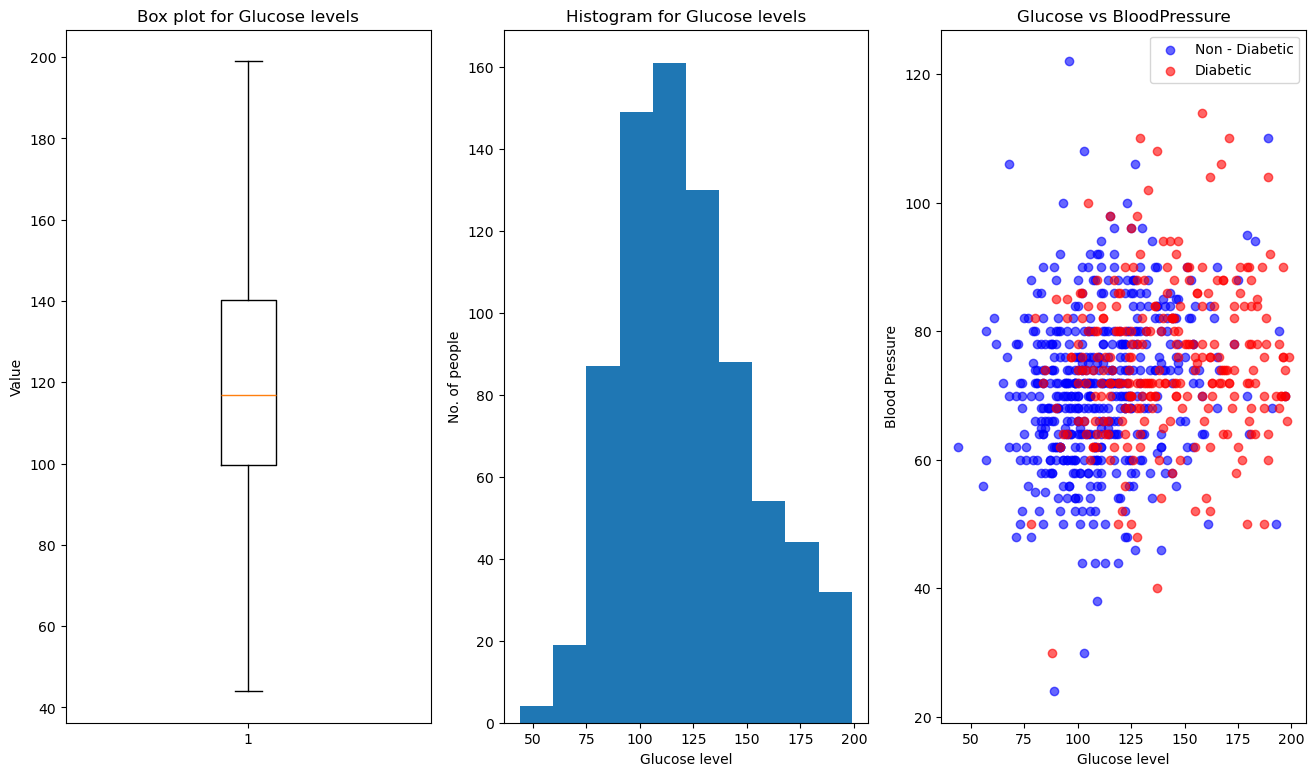

In [16]:
# Create 1 figure with a set of 3 subplots. Each axes should contain a figure as described below: 
# Figure 1: A boxplot for the attribure 'Glucose'
# Figure 2: A histogram for the attribure 'Glucose'
# Figure 3: A scatterplot of Glucose vs BloodPressure, colored by the attribure 'Outcome', include a legend to identify which class-color pairs

# All subplots must have a title that makes sense.


fig, ax = plt.subplots(1, 3, figsize=(16,9)) #create 1 row with 3 plots
#Write your code here
ax[0].set_title('Box plot for Glucose levels')
ax[0].boxplot(data_imputed['Glucose'])
ax[0].set_ylabel('Value')

ax[1].set_title('Histogram for Glucose levels')
ax[1].hist(data_imputed['Glucose'])
ax[1].set_xlabel('Glucose level')
ax[1].set_ylabel('No. of people')

ax[2].scatter(x='Glucose',y='BloodPressure',data = data_imputed[data_imputed['Outcome'] == 0],color='b',label = 'Non - Diabetic',alpha = 0.6)
ax[2].scatter(x='Glucose',y='BloodPressure',data = data_imputed[data_imputed['Outcome'] == 1],color='r',label = 'Diabetic',alpha = 0.6)
ax[2].legend()
ax[2].set_title("Glucose vs BloodPressure")
ax[2].set_xlabel("Glucose level")
ax[2].set_ylabel('Blood Pressure')

## b.	Age by class 

### `Plot the 'Age' attribute in groups of 10 years in relation to the class ('Outcome').`

Information about the cut function [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

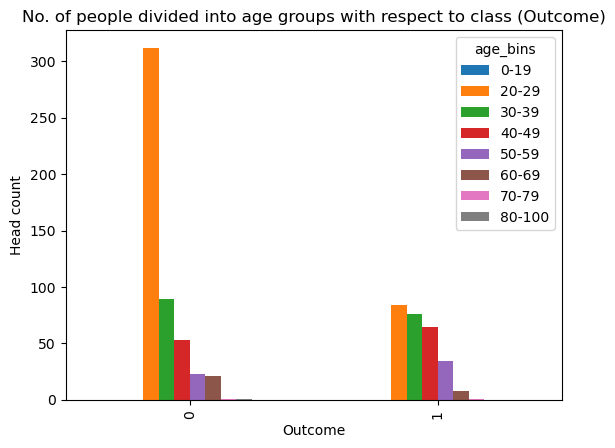

In [17]:
# step 1: Divide the age column into the following age groups: 0-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-100 using the cut function from pandas. 
# The new column should be called age_bins.
# step 2: Store in age_by_class, a dataframe with the counts of unique values of the attribute age_bins by class. You can use groupby() and value_counts()
# step 2: Plot a barplot for the age_by_class. You can use pandas to plot it.
# step 3: **DROP THE age_bins** attribute from data_imputed after you have plotted the barchart. 
# do not skip dropping the age_bins!

# Write your code here
bins = [0,19,29,39,49,59,69,79,100]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-100']
data_imputed['age_bins'] = pd.cut(data_imputed['Age'],bins=bins,labels=labels)
age_by_class = data_imputed.groupby('Outcome')['age_bins'].value_counts()
age_by_class.unstack().plot(kind='bar',title='No. of people divided into age groups with respect to class (Outcome)',ylabel='Head count')

data_imputed.drop(columns=['age_bins'], inplace=True)

In [18]:
# do not delete this
data_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## c.	Your own multivariate question

### `Think of a multivariate question that can be answered with a plot. Write it in the markdown cell below this. Write the code to create the plot in the code cell below. Write a short answer to your question (max 50 words) in the markdown cell after that.`

Bonus points (only in how much I'll enjoy the answer, since there are no points in this homework) if your question is original, so please don't make me read 300 copies of the same question :D

Create bins for preganancy variable and plot the Glucose vs BMI parameters for different bins and give your observations on relation between glucose levels and BMI for women with different no. of pregnancies.

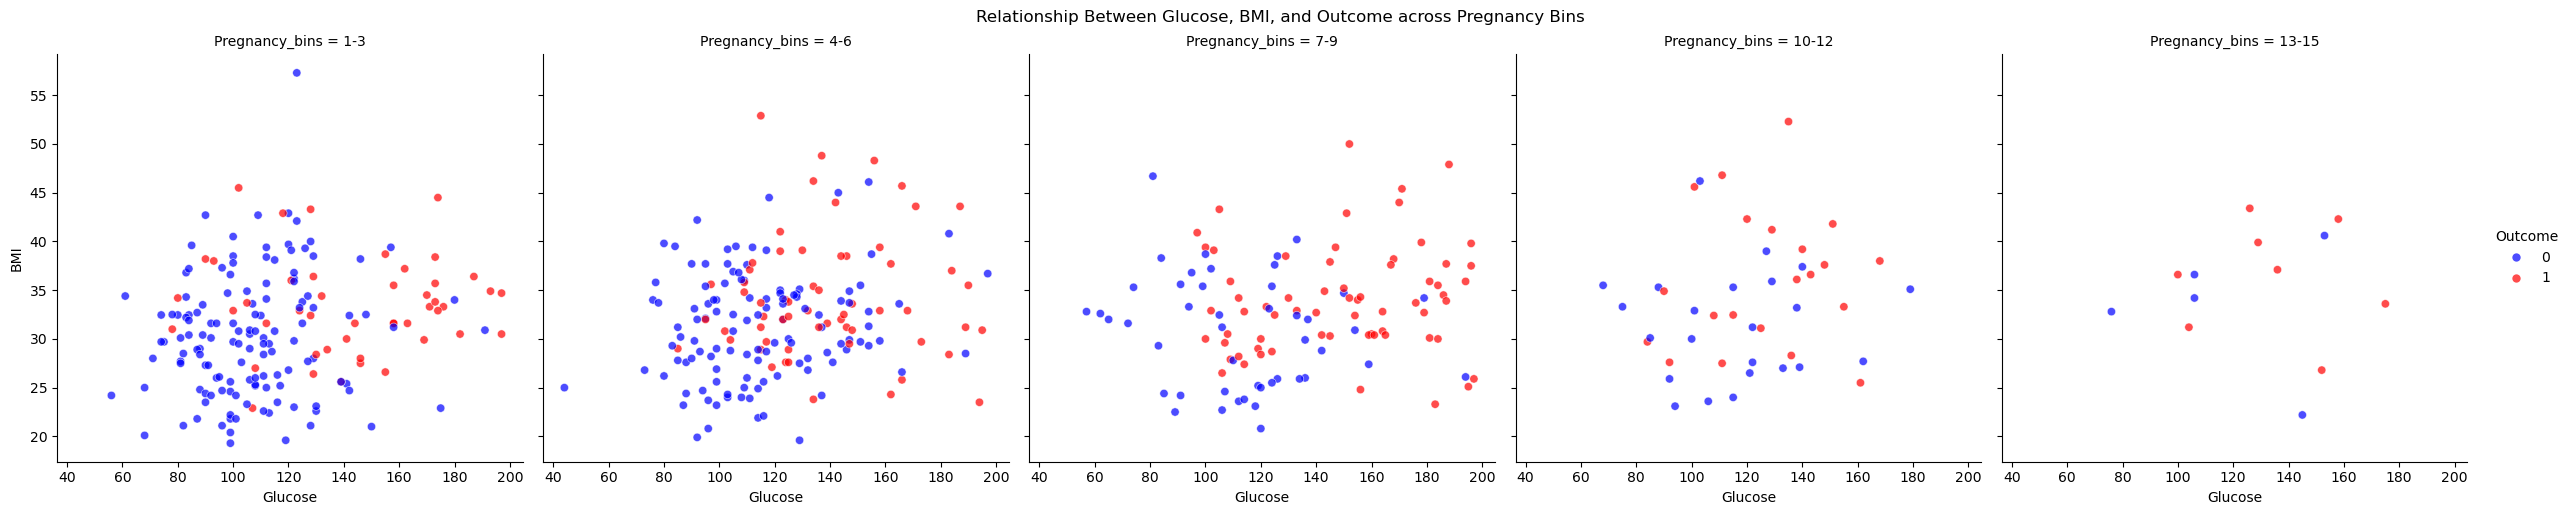

In [19]:
# Write your code here. Remember to restore the dataframe to its original state after you have plotted your plot, or create a copy to use for this exercise.
bins = [1,3,6,9,12,15]
labels = ['1-3','4-6','7-9','10-12','13-15']
data_imputed['Pregnancy_bins'] = pd.cut(data_imputed['Pregnancies'],bins=bins,labels=labels)
plot = sns.relplot(x="Glucose", y="BMI",kind='scatter', hue="Outcome",col='Pregnancy_bins', \
                   data=data_imputed, palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.suptitle('Relationship Between Glucose, BMI, and Outcome across Pregnancy Bins',y=1.02)
data_imputed.drop(columns=['Pregnancy_bins'],inplace=True)




After ploting and analyzing it is clear that individuals with higher glucose levels tend to have higher BMI in all pregnancy bins, but people who are pregnant for more than 7 times tend to have higher chance of diabeties positive even though they have moderate glucose levels and BMI.

## *6.* Standardization

### Standardization transforms data to have a mean of zero and a standard deviation of 1. 

### It is a crucial step before performing PCA, since we are interested in the components that maximize the variance. 





### `Standardize the data_imputed dataset. You can use sklearn.  Store in a variable called 'y' the attribute 'Outcome' (your class)`
### NOTE! Outcome is the class of the dataset indicating if a patient is healthy or has diabetes. As we discussed in the lab, the class should not be included in the standardization. 

In [20]:
# step 1: Use StandardScaler to fit_transform data_imputed, excluding the class (Outcome)
# step 3: Transform the standardized numpy matrix returned by StandardScaler into a dataframe called data_standardized.
# step 4: Rename the columns of the dataframe with their corresponding names.
# step 5: Store in a variable called y the attribute Outcome (your class), do not skip this

# Write your code here

data_for_standardization = data_imputed.drop(columns=['Outcome'])
y = data_imputed['Outcome']

scaler = StandardScaler().fit(data_for_standardization)

standardized_data_Nparray = scaler.transform(data_for_standardization)
data_standardized = pd.DataFrame(standardized_data_Nparray,columns=data_for_standardization.columns)


In [21]:
data_standardized.mean()

Pregnancies                -6.476301e-17
Glucose                     1.665335e-16
BloodPressure               5.782412e-18
SkinThickness              -1.526557e-16
Insulin                     1.272131e-16
BMI                         3.515706e-16
DiabetesPedigreeFunction    2.451743e-16
Age                         1.931325e-16
dtype: float64

In [22]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## *7.* Dimensionality Reduction

## a. PCA

### `Reduce the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component Analysis. Print the information obtained by the following attributes of the pca object: explained_variance_ratio and components_. `

In [23]:
# step1: Reduce the dimensionality of the standardized dataset to 2 Principal Components, with Principal Component analysis. You can use PCA from sklearn. Use random state = 8
# step2: Store the explained variance ratio in an array called explained_variance_ratio.
# step3: Store in a dataframe called df_principal_components, the result of pca's attribute components_,
# (Principal axes in feature space, representing the directions of maximum variance in the data), with the respective attribute names.

# Write your code here
pca = PCA(n_components=2,random_state=RSEED)
pca_applied = pca.fit_transform(data_standardized)

explained_variance_ratio =  pca.explained_variance_ratio_
df_principal_components = pd.DataFrame(pca.components_,columns=data_for_standardization.columns)



In [24]:
df_principal_components

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.308151,0.421193,0.378595,0.389961,0.320934,0.391055,0.147002,0.393323
1,-0.551443,0.066510,-0.139170,0.349889,0.150174,0.438212,0.270892,-0.511597


In [25]:
explained_variance_ratio

array([0.28744768, 0.18428741])

## b. 	Which attribute contributes the most?

### `Store in a variable called attribure_contributing_the_most, which attribure contributes most to the variance of the 1st PC.`

In [26]:
# Which attribute contributes the most in the variance of the 1st principal component? 
# store the name of the attribute here, as a string type:


attribute_contributing_the_most =  "Glucose"

In [27]:
attribute_contributing_the_most

'Glucose'

## 8.  Multi-Dimensional Scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data and it can help visualize the distances or dissimilarities between sets of objects. Examples of similarity or dissimilarity data might include the distance between pairs of cities, or planets at a particular point in time, or the similarity among groups of people (voters, patients etc). 

In these last two excercises we will apply Multi-Dimensional Scaling in our patient dataset using two different versions of the MDS sklearn algorithm. 

We will focus on the attribute **dissimilarity** of the MDS object. The attribute can be either 'euclidean' or 'precomputed'. In the former case the euclidean distance between the data points is computed by the algorithm, while in the latter case the user must themeselves compute the dissimilarities between data points and pass this to fit_transform.  

Please check the sklearn page for MDS to be able to implement the above tasks: [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html). Make sure you understand the parameters of fit_transform and how you could use them for the tasks!


## a. Multi-Dimensional Scaling, task a

###   `Apply MDS on the data_standardized with n_components=2 and dissimilarity='euclidean'. Plot the 2 resulting coordinates (in a scatterplot) with colors respective to the class labels.`

Note: This is very similar to how we applied sklearn's PCA on task 7!

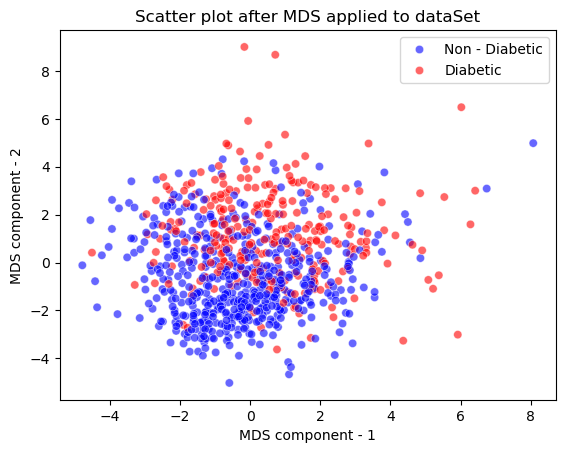

In [28]:
# step 1: Initialize MDS with n_components = 2, random_state=8.
# step 2: Fit and transform the standardized dataset
# step 3: Plot the resulting reduced dataset with colors respective to the class (Outcome).
mds = MDS(n_components=2,random_state=RSEED)

mds_applied = mds.fit_transform(data_standardized)

fig,ax = plt.subplots()

mds_scatter_plot = sns.scatterplot(x=mds_applied[:,0],y=mds_applied[:,1],hue=np.array(y),palette={0:'b',1:'r'},alpha=0.6,ax=ax)
handles, labels = mds_scatter_plot.get_legend_handles_labels()
ax.legend(handles=handles,labels = ['Non - Diabetic','Diabetic'])
ax.set_title('Scatter plot after MDS applied to dataSet')
ax.set_xlabel('MDS component - 1')
ax.set_ylabel('MDS component - 2')

X_2d_a = mds_applied # change this assignment on X_2d_a, but keep X_2d_a as the name of the resulting MDS numpy array

In [29]:
X_2d_a

array([[-0.11966556,  1.79487532],
       [-0.48216357, -1.50489397],
       [-2.57277735,  0.99237592],
       ...,
       [-1.07921573, -0.6098572 ],
       [-0.85854773, -0.16841464],
       [ 0.27402263, -1.3856929 ]])